In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2019 = pd.read_csv("./input/2019 Survey Result.csv")
df_2019['Year'] = '2019'

In [3]:
df_2019_lang_used = df_2019[['Respondent','LanguageWorkedWith']]

In [4]:
def splitter(values):
    return list(itertools.product( *[str(v).split(';') for v in values]))

def expand(df):
    tuples=list()
    for i,row in df.iterrows():
        tuples.extend(splitter(row))
    return  pd.DataFrame.from_records(tuples,columns=df.columns)

In [5]:
df_2019_lang_used = expand(df_2019_lang_used)

In [6]:
df_2019_lang_used = pd.DataFrame(df_2019_lang_used['LanguageWorkedWith'].value_counts().reset_index())
df_2019_lang_used.rename(columns={'index':'LanguageWorkedWith','LanguageWorkedWith':'count'}, inplace=True)
df_2019_lang_used = df_2019_lang_used.sort_values('count', ascending=True)
df_2019_lang_used['perc'] = (df_2019_lang_used['count']/len(df_2019[df_2019['LanguageWorkedWith'].notnull()]))*100

In [7]:
def plot_barh(df,x_col,y_col):
    x_pos = [i for i, _ in enumerate(df[x_col])]
    plt.figure(figsize=(10,10))
    plt.barh(x_pos,df[y_col])
    plt.yticks(x_pos, df[x_col])
    plt.show()

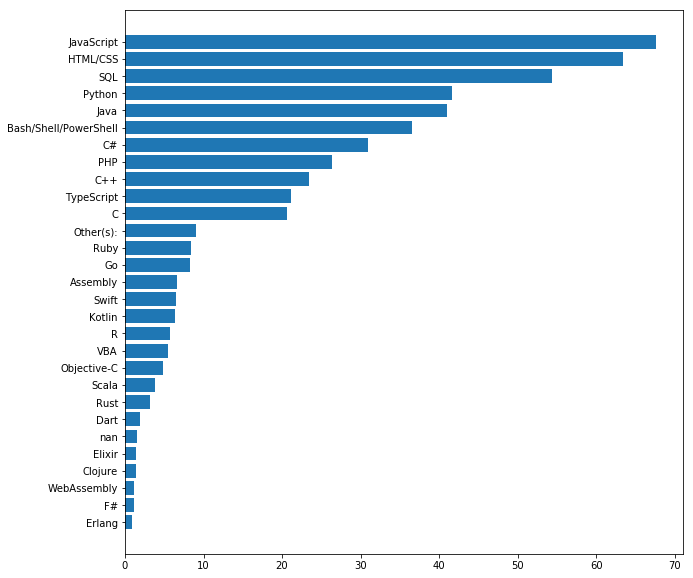

In [8]:
plot_barh(df_2019_lang_used,'LanguageWorkedWith','perc')

### Language Users

In [9]:
df_2019_lang_user = df_2019[['Respondent','LanguageWorkedWith','DevType']]
df_2019_lang_user = df_2019_lang_user[df_2019_lang_user['DevType'].notnull()]
df_2019_lang_user = expand(df_2019_lang_user)

In [12]:
df_2019_lang_user = df_2019_lang_user.groupby(['LanguageWorkedWith','DevType']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)

In [13]:
df_2019_lang_user[df_2019_lang_user['LanguageWorkedWith']=='JavaScript']

,LanguageWorkedWith,DevType,count
323,JavaScript,"Developer, full-stack",36376
319,JavaScript,"Developer, back-end",29372
322,JavaScript,"Developer, front-end",23376
320,JavaScript,"Developer, desktop or enterprise applications",11748
325,JavaScript,"Developer, mobile",9953
334,JavaScript,Student,7574
315,JavaScript,Database administrator,7436
316,JavaScript,Designer,7192
335,JavaScript,System administrator,6558
317,JavaScript,DevOps specialist,6529


In [14]:
df_2019_lang_user[df_2019_lang_user['LanguageWorkedWith']=='Python']

,LanguageWorkedWith,DevType,count
439,Python,"Developer, back-end",16537
443,Python,"Developer, full-stack",15406
442,Python,"Developer, front-end",8442
454,Python,Student,6481
440,Python,"Developer, desktop or enterprise applications",6274
434,Python,Data scientist or machine learning specialist,5125
445,Python,"Developer, mobile",4685
437,Python,DevOps specialist,4647
455,Python,System administrator,4586
435,Python,Database administrator,3945
